그룹 연산
- 복잡한 데이터를 어떤 기준에 따라 여러 그룹으로 나누어서 관찰할 수 있으며 이런 방식으로 분할 처리하는 것을 그룹 연산이라 함
- 그룹 연산은 데이터를 집계, 변환, 필터링하는데 효율적이며 판다스 groupby() 메소드를 사용함
- 그룹 객체 만들기(분할)
- 그룹 연산 메소드(적용,결합)

In [2]:
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic.loc[:,['age','sex','class','fare','survived']]

print('승객 수: ',len(df))
print(df.head())

승객 수:  891
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
1  38.0  female  First  71.2833         1
2  26.0  female  Third   7.9250         1
3  35.0  female  First  53.1000         1
4  35.0    male  Third   8.0500         0


In [3]:
df.value_counts('class')

class
Third     491
First     216
Second    184
dtype: int64

In [4]:
grouped = df.groupby(['class'])
list(grouped)
# for key,group in grouped:
  #  print('* key:',key)
   # print('* number:',len(group))
    #print(group.head())

[('First',
        age     sex  class     fare  survived
  1    38.0  female  First  71.2833         1
  3    35.0  female  First  53.1000         1
  6    54.0    male  First  51.8625         0
  11   58.0  female  First  26.5500         1
  23   28.0    male  First  35.5000         1
  ..    ...     ...    ...      ...       ...
  871  47.0  female  First  52.5542         1
  872  33.0    male  First   5.0000         0
  879  56.0  female  First  83.1583         1
  887  19.0  female  First  30.0000         1
  889  26.0    male  First  30.0000         1
  
  [216 rows x 5 columns]),
 ('Second',
        age     sex   class     fare  survived
  9    14.0  female  Second  30.0708         1
  15   55.0  female  Second  16.0000         1
  17    NaN    male  Second  13.0000         1
  20   35.0    male  Second  26.0000         0
  21   34.0    male  Second  13.0000         1
  ..    ...     ...     ...      ...       ...
  866  27.0  female  Second  13.8583         1
  874  28.0  female

In [8]:
average = grouped.mean()   # 전체의 상대적인 비율을 알아낼 수 있음
average

,age,fare,survived
class,,,
First,38.233441,84.154687,0.629630
Second,29.877630,20.662183,0.472826
Third,25.140620,13.675550,0.242363


In [9]:
grouped.max()

,age,sex,fare,survived
class,,,,
First,80.0,male,512.3292,1
Second,70.0,male,73.5000,1
Third,74.0,male,69.5500,1


In [10]:
# Q. 'Thrid' 그룹만을 선택해서 group3 이름으로 저장하고 통계요약표를 출력하세요.(describe())
group3 = grouped.get_group('Third')
group3.describe()

,age,fare,survived
count,355.000000,491.000000,491.000000
mean,25.140620,13.675550,0.242363
std,12.495398,11.778142,0.428949
min,0.420000,0.000000,0.000000
25%,18.000000,7.750000,0.000000
50%,24.000000,8.050000,0.000000
75%,32.000000,15.500000,0.000000
max,74.000000,69.550000,1.000000


In [11]:
# class 열, sex 열을 기준으로 분할하여 grouped_two에 저장
grouped_two = df.groupby(['class','sex'])
for key, group in grouped_two:
    print('* key:',key)
    print('* number:',len(group))
    print(group.head)

* key: ('First', 'female')
* number: 94
<bound method NDFrame.head of       age     sex  class      fare  survived
1    38.0  female  First   71.2833         1
3    35.0  female  First   53.1000         1
11   58.0  female  First   26.5500         1
31    NaN  female  First  146.5208         1
52   49.0  female  First   76.7292         1
..    ...     ...    ...       ...       ...
856  45.0  female  First  164.8667         1
862  48.0  female  First   25.9292         1
871  47.0  female  First   52.5542         1
879  56.0  female  First   83.1583         1
887  19.0  female  First   30.0000         1

[94 rows x 5 columns]>
* key: ('First', 'male')
* number: 122
<bound method NDFrame.head of       age   sex  class      fare  survived
6    54.0  male  First   51.8625         0
23   28.0  male  First   35.5000         1
27   19.0  male  First  263.0000         0
30   40.0  male  First   27.7208         0
34   28.0  male  First   82.1708         0
..    ...   ...    ...       ...       

In [12]:
average_two = grouped_two.mean()
average_two

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

In [13]:
# Q. ('Third',female) 그룹을 선택해서 group3f에 저장하고 처음 5개행을 출력하세요.

In [14]:
group3f = grouped_two.get_group(('Third','female'))
group3f.head()

,age,sex,class,fare,survived
2,26.0,female,Third,7.9250,1
8,27.0,female,Third,11.1333,1
10,4.0,female,Third,16.7000,1
14,14.0,female,Third,7.8542,0
18,31.0,female,Third,18.0000,0


In [15]:
group3f[['age','fare']].describe()

,age,fare
count,102.000000,144.000000
mean,21.750000,16.118810
std,12.729964,11.690314
min,0.750000,6.750000
25%,14.125000,7.854200
50%,21.500000,12.475000
75%,29.750000,20.221875
max,63.000000,69.550000


적용-결합
데이터 집계(agg)
- 집계 연산을 처리하는 사용자 정의함수를 그룹 객체에 적용하려면 agg() 메소드 사용
- 모든 열에 여러 함수를 매핑: group객체.agg([함수1,함수2,함수3....])
- 각 열마다 다른 함수를 매핑: group객체.agg({'열1':함수1,'열2':함수2....})

변환(transform)
- 원소의 본래 행 인덱스와 열 이름을 기준으로 연산 결과를 반환
- 데이터 변환 연산 : group객체.transform(매핑함수)

필터링(filter)
- 그룹 객체에 filter() 메소드를 적용할 때 조건식을 가진 함수를 전달하면 조건이 참인 그룹만을 남김
- 그룹 객체 필터링 : group객체.filter(조건 함수식)  # 조건이 참임것만 남김

객체에 함수 매핑(apply)
- 판다스 객체의 개별 원소를 특정 함수에 일대일로 매핑, 사용자가 원하는 대부분의 연산을 그룹 객체에 적용
- group객체.apply(매핑함수)

In [16]:
# Q. (최대값 - 최소값)을 반환하는 사용자 함수를 정의하고 agg() 함수에 인수로 전달하여 그룹별로 집계하여
# agg_minmax 이름으로 저장 후 처음 5개행을 출력하세요.

In [17]:
titanic = sns.load_dataset('titanic')
df = titanic.loc[:,['age','sex','class','fare','survived']]
grouped = df.groupby(['class'])
grouped.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0
5,NaN,male,Third,8.4583,0
6,54.0,male,First,51.8625,0
7,2.0,male,Third,21.0750,0
9,14.0,female,Second,30.0708,1
11,58.0,female,First,26.5500,1


In [18]:
# Q. grouped의 모든 열에 min, max 함수를 적용하여 출력하세요.

In [19]:
agg_all = grouped.agg(['min','max'])
agg_all.head()

age           sex       fare           survived    
         min   max     min   max  min       max      min max
class                                                       
First   0.92  80.0  female  male  0.0  512.3292        0   1
Second  0.67  70.0  female  male  0.0   73.5000        0   1
Third   0.42  74.0  female  male  0.0   69.5500        0   1

In [20]:
# Q. grouped에서 age계열은 mean, fare계열은 min,max 함수를 적용하여 출력하세요.

In [21]:
agg_sep = grouped.agg({'age':'mean','fare':['min','max']})
agg_sep

age fare          
             mean  min       max
class                           
First   38.233441  0.0  512.3292
Second  29.877630  0.0   73.5000
Third   25.140620  0.0   69.5500

In [22]:
# Q. 데이터의 개수가 200개 이상인 그룹만을 필터링하여 데이터프레임으로 반환하여 처음 5개 행을 출력하세요.

In [23]:
grouped_filter = grouped.filter(lambda x: len(x)>=200).head()
print(grouped_filter,'\n')
grouped_filter.value_counts('class')

    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
1  38.0  female  First  71.2833         1
2  26.0  female  Third   7.9250         1
3  35.0  female  First  53.1000         1
4  35.0    male  Third   8.0500         0 



class
Third     3
First     2
Second    0
dtype: int64

In [24]:
# Q. age 열의 평균이 30보다 작은 그룹만을 필터링하여 데이터프레임으로 반환하여 age_filter 이름으로 저장 후 끝에서 5개행 출력

In [25]:
age_filter = grouped.filter(lambda x : x.age.mean() < 30)
age_filter.tail(5)

,age,sex,class,fare,survived
884,25.0,male,Third,7.050,0
885,39.0,female,Third,29.125,0
886,27.0,male,Second,13.000,0
888,NaN,female,Third,23.450,0
890,32.0,male,Third,7.750,0


In [26]:
# Q. 각 그룹별 통계요약표를 집계하세요.

In [27]:
for key, group in grouped:
    print(key, group.describe(),'\n')


First               age        fare    survived
count  186.000000  216.000000  216.000000
mean    38.233441   84.154687    0.629630
std     14.802856   78.380373    0.484026
min      0.920000    0.000000    0.000000
25%     27.000000   30.923950    0.000000
50%     37.000000   60.287500    1.000000
75%     49.000000   93.500000    1.000000
max     80.000000  512.329200    1.000000 

Second               age        fare    survived
count  173.000000  184.000000  184.000000
mean    29.877630   20.662183    0.472826
std     14.001077   13.417399    0.500623
min      0.670000    0.000000    0.000000
25%     23.000000   13.000000    0.000000
50%     29.000000   14.250000    0.000000
75%     36.000000   26.000000    1.000000
max     70.000000   73.500000    1.000000 

Third               age        fare    survived
count  355.000000  491.000000  491.000000
mean    25.140620   13.675550    0.242363
std     12.495398   11.778142    0.428949
min      0.420000    0.000000    0.000000
25%     18.

In [28]:
agg_grouped = grouped.apply(lambda x: x.describe())
agg_grouped

age        fare    survived
class                                           
First  count  186.000000  216.000000  216.000000
       mean    38.233441   84.154687    0.629630
       std     14.802856   78.380373    0.484026
       min      0.920000    0.000000    0.000000
       25%     27.000000   30.923950    0.000000
       50%     37.000000   60.287500    1.000000
       75%     49.000000   93.500000    1.000000
       max     80.000000  512.329200    1.000000
Second count  173.000000  184.000000  184.000000
       mean    29.877630   20.662183    0.472826
       std     14.001077   13.417399    0.500623
       min      0.670000    0.000000    0.000000
       25%     23.000000   13.000000    0.000000
       50%     29.000000   14.250000    0.000000
       75%     36.000000   26.000000    1.000000
       max     70.000000   73.500000    1.000000
Third  count  355.000000  491.000000  491.000000
       mean    25.140620   13.675550    0.242363
       std     12.495398   11.778142    0.428949
       min      0.420000    0.000000    0.000000
       25%     18.000000    7.750000    0.000000
       50%     24.000000    8.050000    0.000000
       75%     32.000000   15.500000    0.000000
       max     74.000000   69.550000    1.000000

In [29]:
# Q. 평균값에서 표준편차의 몇배 떨어져 있는지를 평가하는 사용자 함수를 작성하세요.

In [30]:
def z_score(x):
    return (x- x.mean())/x.std()

In [31]:
# Q. 위에서 구한 사용자 함수를 이용하여 age 칼럼을 transform()함수로 변환하세요.

In [32]:
grouped.age.transform(z_score)[:3]

0   -0.251342
1   -0.015770
2    0.068776
Name: age, dtype: float64

In [33]:
# Q. 위에서 구한 사용자 함수를 이용하여 age 칼럼을 apply()함수로 매핑하여 출력하세요.

In [34]:
grouped.age.apply(z_score)[:3]

0   -0.251342
1   -0.015770
2    0.068776
Name: age, dtype: float64

In [35]:
grouped[['age']].apply(lambda x : z_score(x))[:3]

,age
0,-0.251342
1,-0.015770
2,0.068776


In [36]:
df1 = df.groupby(['class','sex'])
type(df1)

pandas.core.groupby.generic.DataFrameGroupBy

In [37]:
# Q. class 값이 First인 행을 선택하여 출력하세요.

In [38]:
df2 = df1.mean()
print(df2,'\n')
type(df2)

                     age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447 



pandas.core.frame.DataFrame

In [39]:
df2.loc['First']

,age,fare,survived
sex,,,
female,34.611765,106.125798,0.968085
male,41.281386,67.226127,0.368852


In [40]:
# Q. class 값이 First이고 sex값이 female인 행을 선택하여 출력하세요.

In [41]:
df2.loc[('First','female')]

age          34.611765
fare        106.125798
survived      0.968085
Name: (First, female), dtype: float64

피벗
- 피벗 테이블을 구성하는 4가지 요소(행 인덱스,열 인덱스,데이터 값, 데이터 집계함수)에 적용할 데이터프레임의 열을 각각 지정하여 함수의 인자로 전달

In [42]:
import pandas as pd
df2 = pd.read_pickle('./dataset/df2.pkl')
df2.head()

,0,1,2,3,4
0,c0,c1,c2,c3,c4
1,0,1,2,3,4
2,5,6,7,8,9


In [43]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic.copy()
df = df.loc[:,['age','sex','class','fare','survived']]
df.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [44]:
# 행, 열, 값 집계에 사용할 열을 1개씩 지정 - 평균 집계
pdf1 = pd.pivot_table(df,
                     index = 'class', # 행 위치에 들어갈 열
                     columns = 'sex', # 열 위치에 들어갈 열
                     values = 'age',  # 데이터로 사용할 열
                     aggfunc = 'mean') # 데이터 집계함수
pdf1.head()

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


In [45]:
pdf2 = pd.pivot_table(df,
                     index = 'class', # 행 위치에 들어갈 열
                     columns = 'sex', # 열 위치에 들어갈 열
                     values = 'survived',  # 데이터로 사용할 열
                     aggfunc = ['mean','sum']) # 데이터 집계함수
pdf2.head()

mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47

In [46]:
pdf3 = pd.pivot_table(df,
                     index = ['class','sex'], # 행 위치에 들어갈 열
                     columns = 'survived', # 열 위치에 들어갈 열
                     values =  ['age','fare'],  # 데이터로 사용할 열
                     aggfunc = ['mean','max']) # 데이터 집계함수
pdf3.head()

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875

In [47]:
# Q. titanic 데이터에 대하여 피벗을 사용하여 의미있는 탐색을 수행하고 2가지 이상의 인사이트를 기술하세요.
titanic = sns.load_dataset('titanic')
df = titanic.copy()
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [48]:
df = titanic.copy()
pdf1 = pd.pivot_table(df,
                    index = ['class','alone'], 
                    columns =['sex'],  
                    values = 'survived',  
                    aggfunc = ['mean','sum'])  
pdf1.head()


mean              sum     
sex             female      male female male
class  alone                                
First  False  0.966667  0.425532     58   20
       True   0.970588  0.333333     33   25
Second False  0.931818  0.277778     41   10
       True   0.906250  0.097222     29    7
Third  False  0.416667  0.180723     35   15

In [49]:
titanic = sns.load_dataset('titanic')
df = titanic.copy()

def get_catrgory(age):
    cat=''
    if age <= 5: cat='Baby'
    elif age <= 12: cat='Child'
    elif age <=19: cat='Teenager'
    elif age <=35: cat='Young_adult'
    elif age <=60: cat='Adult'
    else: cat='Elderly'
    return cat

df['age_cat'] = df.age.apply(lambda x: get_catrgory(x))


pdf=pd.pivot_table(df, index = ['class','sex'],columns='age_cat' ,values='survived', aggfunc=['mean','sum'])
pdf.head()


mean                                                   sum  \
age_cat           Adult      Baby Child   Elderly  Teenager Young_adult Adult   
class  sex                                                                      
First  female  0.972222  0.000000   NaN  1.000000  1.000000    0.969697    35   
       male    0.370370  1.000000   1.0  0.181818  0.250000    0.535714    20   
Second female  0.850000  1.000000   1.0  1.000000  1.000000    0.921053    17   
       male    0.037037  1.000000   1.0  0.250000  0.100000    0.060000     1   
Third  female  0.142857  0.733333   0.0  0.604651  0.590909    0.476190     2   

                                                       
age_cat       Baby Child Elderly Teenager Young_adult  
class  sex                                             
First  female    0     0      11       13          32  
       male      2     1       6        1          15  
Second female    5     3       2        8          35  
       male      8     1       3        1           3  
Third  female   11     0      26       13          20

시계열 데이터
- df의 행인덱스로 사용하면 시간으로 기록된 데이터를 분석하는 것이 매우 유용
- 특정 시점을 기록하는 Timestamp와 두 시점 사이의 일정한 기간을 나타내는 Period가 있음
- 문자열 또는 숫자로 저장되어 있는 시간 데이터를 시계열 객체인 TImestamp로 변환하는 함수를 제공
- 판다스 to_datetime() 함수를 사용하면 문자열 등 다른 자료형을 판다스 Timestamp를 나타내는 dateTime64 자료형으로 변환 가능

In [50]:
import pandas as pd
df = pd.read_csv('./dataset/stock-data.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [52]:
df['new_Date'] = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


In [53]:
df1 = df.copy()
df1.set_index('new_Date',inplace=True)
df1.drop('Date',axis=1,inplace=True)
df1.head()

,Close,Start,High,Low,Volume
new_Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


In [54]:
df1 = df1.reset_index()
df1.head()

,new_Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [55]:
df1 = df.copy()
df1['Year'] = df1.new_Date.dt.year
df1.head()
df1['Month'] = df1.new_Date.dt.month
df1.head()
df1['Day'] = df1.new_Date.dt.day
df1.head()

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Day
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6,26


In [56]:
# 일정한 기간을 나타내는 Period 객체로 변환
df1['Date_m'] = df1.new_Date.dt.to_period(freq='M')
df1.head()

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Day,Date_m
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2,2018-07
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,29,2018-06
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,28,2018-06
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27,2018-06
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6,26,2018-06


In [57]:
df1.set_index('new_Date',inplace=True)
df1.drop('Date',axis=1,inplace=True)
df1.head()

,Close,Start,High,Low,Volume,Year,Month,Day,Date_m
new_Date,,,,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018,7,2,2018-07
2018-06-29,10700,10550,10900,9990,170253,2018,6,29,2018-06
2018-06-28,10400,10900,10950,10150,155769,2018,6,28,2018-06
2018-06-27,10900,10800,11050,10500,133548,2018,6,27,2018-06
2018-06-26,10800,10900,11000,10700,63039,2018,6,26,2018-06


In [58]:
df_y = df1.loc['2018-07']
df_y

,Close,Start,High,Low,Volume,Year,Month,Day,Date_m
new_Date,,,,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018,7,2,2018-07


In [59]:
df_d = df1.loc['2018-06-27','Start':'High']
df_d.head()

,Start,High
new_Date,,
2018-06-27,10800,11050


In [60]:
# 날짜 간격
endday = pd.to_datetime('2018-12-25')
df1['time_delta'] = endday - df1.index
df1.set_index('time_delta',inplace=True)
df1.head()

,Close,Start,High,Low,Volume,Year,Month,Day,Date_m
time_delta,,,,,,,,,
176 days,10100,10850,10900,10000,137977,2018,7,2,2018-07
179 days,10700,10550,10900,9990,170253,2018,6,29,2018-06
180 days,10400,10900,10950,10150,155769,2018,6,28,2018-06
181 days,10900,10800,11050,10500,133548,2018,6,27,2018-06
182 days,10800,10900,11000,10700,63039,2018,6,26,2018-06


In [61]:
# 시계열 데이터 만들기
ts_ms = pd.date_range(start='2019-01-01',
                     end = None,
                     periods=12,
                     freq='MS',   # MS 월초, M 월말, 3M 3개월
                     tz='Asia/Seoul')
ts_ms

DatetimeIndex(['2019-01-01 00:00:00+09:00', '2019-02-01 00:00:00+09:00',
               '2019-03-01 00:00:00+09:00', '2019-04-01 00:00:00+09:00',
               '2019-05-01 00:00:00+09:00', '2019-06-01 00:00:00+09:00',
               '2019-07-01 00:00:00+09:00', '2019-08-01 00:00:00+09:00',
               '2019-09-01 00:00:00+09:00', '2019-10-01 00:00:00+09:00',
               '2019-11-01 00:00:00+09:00', '2019-12-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')

In [62]:
df1.shape

(20, 9)

In [63]:
import warnings
warnings.filterwarnings('ignore')
df_a = df1.iloc[:12,:]
df_a['index'] = ts_ms
df_a.head()

,Close,Start,High,Low,Volume,Year,Month,Day,Date_m,index
time_delta,,,,,,,,,,
176 days,10100,10850,10900,10000,137977,2018,7,2,2018-07,2019-01-01 00:00:00+09:00
179 days,10700,10550,10900,9990,170253,2018,6,29,2018-06,2019-02-01 00:00:00+09:00
180 days,10400,10900,10950,10150,155769,2018,6,28,2018-06,2019-03-01 00:00:00+09:00
181 days,10900,10800,11050,10500,133548,2018,6,27,2018-06,2019-04-01 00:00:00+09:00
182 days,10800,10900,11000,10700,63039,2018,6,26,2018-06,2019-05-01 00:00:00+09:00


In [64]:
# df_a.drop('Month',axis=1,inplace=True)
df_a['Month'] = df_a['index'].dt.month
df_a.head()

,Close,Start,High,Low,Volume,Year,Month,Day,Date_m,index
time_delta,,,,,,,,,,
176 days,10100,10850,10900,10000,137977,2018,1,2,2018-07,2019-01-01 00:00:00+09:00
179 days,10700,10550,10900,9990,170253,2018,2,29,2018-06,2019-02-01 00:00:00+09:00
180 days,10400,10900,10950,10150,155769,2018,3,28,2018-06,2019-03-01 00:00:00+09:00
181 days,10900,10800,11050,10500,133548,2018,4,27,2018-06,2019-04-01 00:00:00+09:00
182 days,10800,10900,11000,10700,63039,2018,5,26,2018-06,2019-05-01 00:00:00+09:00


In [65]:
df_a.set_index('Month',inplace=True)
df_a.head()

,Close,Start,High,Low,Volume,Year,Day,Date_m,index
Month,,,,,,,,,
1,10100,10850,10900,10000,137977,2018,2,2018-07,2019-01-01 00:00:00+09:00
2,10700,10550,10900,9990,170253,2018,29,2018-06,2019-02-01 00:00:00+09:00
3,10400,10900,10950,10150,155769,2018,28,2018-06,2019-03-01 00:00:00+09:00
4,10900,10800,11050,10500,133548,2018,27,2018-06,2019-04-01 00:00:00+09:00
5,10800,10900,11000,10700,63039,2018,26,2018-06,2019-05-01 00:00:00+09:00


<AxesSubplot:xlabel='Month'>

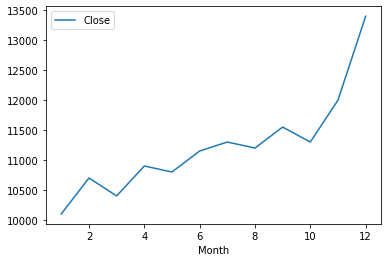

In [66]:
df_g = df_a[['Close']]
df_g.plot()

In [70]:
# df_r = df_a.reset_index()
# df_r
df_a = df_r.set_index('index')
df_a.head()

,Month,Close,Start,High,Low,Volume,Year,Day,Date_m
index,,,,,,,,,
2019-01-01 00:00:00+09:00,1,10100,10850,10900,10000,137977,2018,2,2018-07
2019-02-01 00:00:00+09:00,2,10700,10550,10900,9990,170253,2018,29,2018-06
2019-03-01 00:00:00+09:00,3,10400,10900,10950,10150,155769,2018,28,2018-06
2019-04-01 00:00:00+09:00,4,10900,10800,11050,10500,133548,2018,27,2018-06
2019-05-01 00:00:00+09:00,5,10800,10900,11000,10700,63039,2018,26,2018-06


In [ ]:
df_sorted = df_a.sort_index(ascending=False)
df_sorted.head()

In [ ]:
df_value = df_a.sort_values(by='Volume',ascending=False)
df_value.head()

In [ ]:
# Period 배열

pr_m = pd.period_range(start = '2019-01-01',
                      end = None,
                      periods = 3,
                      freq='M') # 월
print(pr_m,'\n')
pr_h = pd.period_range(start = '2019-01-01',
                      end = None,
                      periods = 3,
                      freq='2H') # 시간
print(pr_h)

python, numpy, pandas 날짜 타입 비교 및 정리
https://ellun.tistory.com/320


In [ ]:
# timestamp -> str 변환
import time
today = time.time()
print(today,type(today),'\n')
s = str(today)
print(s,type(s))

In [ ]:
# datetime -> str
from datetime import datetime
s = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print(s,type(s))

In [ ]:
# str -> datetime
s = '2022-01-17 14:20:28'
dt = datetime.strptime(s,'%Y-%m-%d %H:%M:%S')
print(dt,type(dt))

In [ ]:
# str -> timestamp(파이썬의 timestamp)
from datetime import datetime
import time
s = '2022-01-17 14:20:28'
ts = time.mktime(datetime.strptime(s,'%Y-%m-%d %H:%M:%S').timetuple())
print(ts)


In [ ]:
#datetime -> timestamp
print(datetime.now(),type(datetime.now()),'\n')
ts = time.mktime(datetime.now().timetuple())
print(ts,type(ts))

In [ ]:
# [과제] 1) str -> datetime 2) datetime -> str -> timestamp, 3) timestamp -> str -> datetime

In [68]:
import datetime, time
# str -> datetime
s = '2013-12-24 13:12:24'
dt = datetime.datetime.strptime(s,'%Y-%m-%d %H:%M:%S')
print(dt,type(dt))

# timestamp -> str -> datetime
tm = time.time()
stm = str(tm)
print(stm,type(stm))
dtm = datetime.datetime.fromtimestamp(float(stm))
print(dtm,type(dtm))

# datetime -> str -> timestamp
st = str(dt)
print(st,type(st))
tst = time.mktime(datetime.datetime.strptime(st,'%Y-%m-%d %H:%M:%S').timetuple())
print(tst,type(tst))


2013-12-24 13:12:24 <class 'datetime.datetime'>
1642465288.9672651 <class 'str'>
2022-01-18 09:21:28.967265 <class 'datetime.datetime'>
2013-12-24 13:12:24 <class 'str'>
1387858344.0 <class 'float'>


In [74]:
import datetime
from datetime 
# str -> datetime
s = '2022-01-17 14:14:22' 
dt = datetime.strptime(s,'%Y-%m-%d %H:%M:%S')
print(dt,type(dt),'\n')

# datetime -> str -> timestamp
a = datetime.now()
b = str(a)
c = time.mktime(datetime.strptime(b,'%Y-%m-%d %H:%M:%S.%f').timetuple())
print(c,type(c),'\n')

# timestamp -> str -> datetime
today= time.time()
print(today,type(today),'\n')
t = datetime.fromtimestamp(today)
s = str(t)
print(s,type(s),'\n')


z = datetime.strptime(s, '%Y-%m-%d %H:%M:%S.%f')
print(t,type(t),'\n')

SyntaxError: invalid syntax (Temp/ipykernel_7392/2833817381.py, line 2)

In [80]:
# 1년전 datetime 값
from datetime import timedelta
import time

datetime_now = datetime.now()
delta_datetime = timedelta(days=365)
print(delta_datetime)
datetime_now + delta_datetime

365 days, 0:00:00


datetime.datetime(2023, 1, 17, 14, 40, 23, 344211)

In [81]:
# 두 날짜간의 일수 구하기
from datetime import datetime
since_timestamp = datetime.strptime('20180301','%Y%m%d')
until_timestamp = datetime.strptime('20180331','%Y%m%d')
result = until_timestamp - since_timestamp
result
                                    

datetime.timedelta(days=30)

In [85]:
# 특정 요일 구하기
import datetime
def get_yoil(y,m,d):
    days = ['MON','TUE','WED','THU','FRI','SAT','SUN']
    return days[datetime.date(y,m,d).weekday()] # 월요일부터 인덱스 0
get_yoil(2022,1,17)

'MON'

In [92]:
# 판다스 이용
t = pd.Timestamp(1513393335, unit= 's', tz='US/Pacific')
print(t,type(t))

2017-12-15 19:02:15-08:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [91]:
today = time.time()
today

1642399769.159572

In [94]:
date = pd.Timestamp(1642399769.159572, unit='s',tz='Asia/Seoul')
print(date,type(date))

2022-01-17 15:09:29.159571886+09:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [95]:
pd.to_datetime([1,2,3], unit='D', origin=pd.Timestamp('1960-01-10'))

DatetimeIndex(['1960-01-11', '1960-01-12', '1960-01-13'], dtype='datetime64[ns]', freq=None)

In [96]:
pr_m = pd.period_range(start='2019-01-01', end=None, periods=3, freq='M')
pr_m

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]')

In [99]:
import numpy as np
sr0 = pd.Series(pd.date_range('2021-01-01', periods=10, freq='D'),name='date')
sr1 = pd.Series(np.random.randint(1000,2000,10),name='price')
sr2 = pd.Series((np.random.rand(10)*100).round(2),name='profit')
df = pd.concat([sr0,sr1,sr2],axis=1)
df.head()

,date,price,profit
0,2021-01-01,1206,69.19
1,2021-01-02,1955,49.02
2,2021-01-03,1143,38.75
3,2021-01-04,1027,1.28
4,2021-01-05,1963,4.48


In [101]:
import pandas as pd
df = pd.read_csv('./dataset/stock-data.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [ ]:
# datetime64 자료형으로 변환한 후 년, 월, 일로 분리하고 year를 인덱스로 셋팅하여 출력하세요.

In [102]:
df['new_Date'] = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


In [ ]:
# Q. stock-data.csv를 데이터프레임으로 불러와서 datetime64자료형으로 변환한 후에 period로 변환하고 년월일 표기 변경하여 년월을 인덱스로 셋팅하여 출력하세요.

In [78]:
df = pd.read_csv('./dataset/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
# [과제] 'mpg'를 'kpl'로 환산하여 새로운 열을 생성하고 처음 3개 행을 반올림하여 소수점 아래 둘째 자리까지 출력하세요

In [131]:
df1 = pd.read_csv('./dataset/auto-mpg.csv')
mpg_to_kpl = 1.60934/3.78541
df1['kpl'] = round(df1['mpg']*mpg_to_kpl,2)
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,6.38
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,7.65
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,6.80
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,7.23


In [ ]:
# [과제] horsepower 열을 체크해서 전처리가 필요한 사항을 기술하세요(자료형 타입이 문자로 되어있는 이유 및 처리 float로 처리)
# (hint : np.nan으로 대체)

In [81]:
import numpy as np
df1 = df.copy()
# df1.horsepower = df1.horsepower.replace('?',np.nan)
sr1 = pd.to_numeric(df1.horsepower, errors = 'coerce')
df1['horsepower'] = sr1
df1.info()

print(df1.horsepower.isnull().sum())
df_sorted = df1.sort_values(by='horsepower',ascending=False)
df_sorted


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB
6


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
116,16.0,8,400.0,230.0,4278,9.5,73,1,pontiac grand prix
95,12.0,8,455.0,225.0,4951,11.0,73,1,buick electra 225 custom
13,14.0,8,455.0,225.0,3086,10.0,70,1,buick estate wagon (sw)
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
...,...,...,...,...,...,...,...,...,...
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i


In [ ]:
# [과제] horsepower 열의 자료형 타입 문제를 해결하고 NAN 값의 개수를 NAN값 삭제 전 후로 비교하세요.

In [82]:
df1.horsepower = df1.horsepower.astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [83]:
print(df1.horsepower.isnull().sum())
df1.dropna(subset=['horsepower'],axis=0,inplace=True) # 누락데이터 삭제
df1.horsepower.isnull().sum()

6


0

In [ ]:
# [과제] df를 바이너리 파일로 df.pkl로 저장 후 다시 불러오세요.

In [84]:
import csv
import pickle
df1.to_pickle('./dataset/auto_df.pkl') # 저장
df1 = pd.read_pickle('./dataset/auto_df.pkl') # 불러오기
df1.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [ ]:
# [과제] horsepower 열의 최대값의 절대값으로 horsepower 열의 모든 데이터를 나눠서 저장하세요.

In [89]:
df_max = df1.horsepower.max()
df_max
df_div = df1.horsepower/abs(df_max)
df_div.head()

0    0.565217
1    0.717391
2    0.652174
3    0.652174
4    0.608696
Name: horsepower, dtype: float64

In [ ]:
# [과제] horsepower 각 열 데이터에서 해당 열의 최소값을 뺀 값을 분자, 해당 열의 최대값 - 최소값을 분모로 계산하여 저장하세요.

In [90]:
a=min(df1.horsepower)
b=max(df1.horsepower)
df1.horsepower=df1.horsepower.apply(lambda x:(x-a)/(b-a))
df1.horsepower.head()

0    0.456522
1    0.646739
2    0.565217
3    0.565217
4    0.510870
Name: horsepower, dtype: float64

<AxesSubplot:>

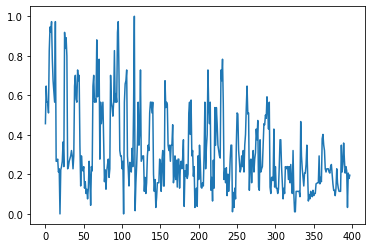

In [93]:
df1.horsepower.plot()

In [106]:
# [과제] origin 열의 고유값을 출력하세요

In [94]:
df1.origin.unique()

array([1, 3, 2], dtype=int64)

In [ ]:
# [과제] 정수형 데이터를 문자형 데이터로 변환한 후 고유값을 출력하세요(1:'USA',2:'EU',3:'JAPAN')

In [96]:
df1['origin'].replace({1:'USA',2:'EU',3:'JAPAN'}, inplace=True) 
print(df1['origin'].unique())

['USA' 'JPN' 'EU']


In [ ]:
# [과제] origin 열의 자료형을 확인하고 범주형(category)으로 변환하여 출력하세요.

In [98]:
df1 = pd.read_pickle('./dataset/auto_df.pkl')
print(df1.info())
df1['origin'] = df1.origin.astype('category')
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    int64   
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null

In [ ]:
# [과제] origin 열을 범주형에서 문자열로 변환한 후 자료형을 출력하세요.

In [100]:
df1['origin'] = df1.origin.astype('str')
print(df1.origin[:3],df1.origin.dtype)

0    1
1    1
2    1
Name: origin, dtype: object object


In [ ]:
# [과제] horsepower 를 3개의 bin으로 나누고 bin_names = ['저출력','보통출력','고출력']으로 출력하세요.
# np.histogram() 함수로 3개의 bin으로 나눔

In [106]:
import numpy as np
count,bin_dividers = np.histogram(df1.horsepower,bins=3)
print(bin_dividers)

bin_names = ['저출력','보통출력','고출력']
df1['hp_bin'] = pd.cut(x=df1.horsepower,     # 데이터 배열
                    bins=bin_dividers,    # 경계 값 리스트
                    labels=bin_names,     # bin 이름
                    include_lowest=True) # 첫 경계 값 포함할지를 결정
df1[['horsepower','hp_bin']].head(10)

[ 46.         107.33333333 168.66666667 230.        ]


,horsepower,hp_bin
0,130.0,보통출력
1,165.0,보통출력
2,150.0,보통출력
3,150.0,보통출력
4,140.0,보통출력
5,198.0,고출력
6,220.0,고출력
7,215.0,고출력
8,225.0,고출력
9,190.0,고출력


In [ ]:
# [과제] horsepower 열의 최대값의 절대값으로 모든 데이터를 나누는 정규화를 수행한 후 통계요약표를 출력하세요.

In [107]:
df1['horsepower'] = df1['horsepower']/abs(df1['horsepower'].max())
df1[['horsepower']].describe()


,horsepower
count,392.000000
mean,0.454215
std,0.167353
min,0.200000
25%,0.326087
50%,0.406522
75%,0.547826
max,1.000000
